In [13]:
def missing_value_visualization(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    colors = ['black','white']
    # colors = ['white','black']
    sns.heatmap(df.isnull(), cmap=sns.color_palette(colors))

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/used_cars.csv', usecols=list(range(24)), nrows=5000)

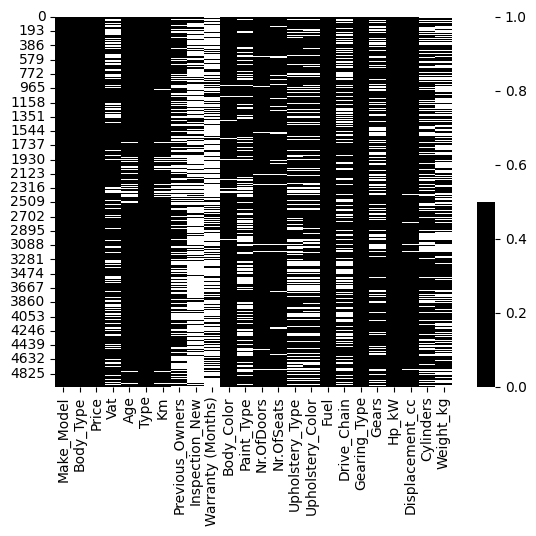

In [14]:
missing_value_visualization(df)

In [17]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Body_Type               7
Vat                  1484
Age                   375
Type                    1
Km                    266
Previous_Owners      2083
Inspection_New       3858
Warranty (Months)    3458
Body_Color            110
Paint_Type           1699
Nr.OfDoors             51
Nr.OfSeats            239
Upholstery_Type      1544
Upholstery_Color     1486
Drive_Chain          1826
Gears                1504
Hp_kW                   3
Displacement_cc        77
Cylinders            1445
Weight_kg            2033
dtype: int64


In [18]:
missing_val_count_by_column

Make_Model              0
Body_Type               7
Price                   0
Vat                  1484
Age                   375
Type                    1
Km                    266
Previous_Owners      2083
Inspection_New       3858
Warranty (Months)    3458
Body_Color            110
Paint_Type           1699
Nr.OfDoors             51
Nr.OfSeats            239
Upholstery_Type      1544
Upholstery_Color     1486
Fuel                    0
Drive_Chain          1826
Gearing_Type            0
Gears                1504
Hp_kW                   3
Displacement_cc        77
Cylinders            1445
Weight_kg            2033
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(df)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Audi A1'

In [22]:
import missingno as msno

<Axes: >

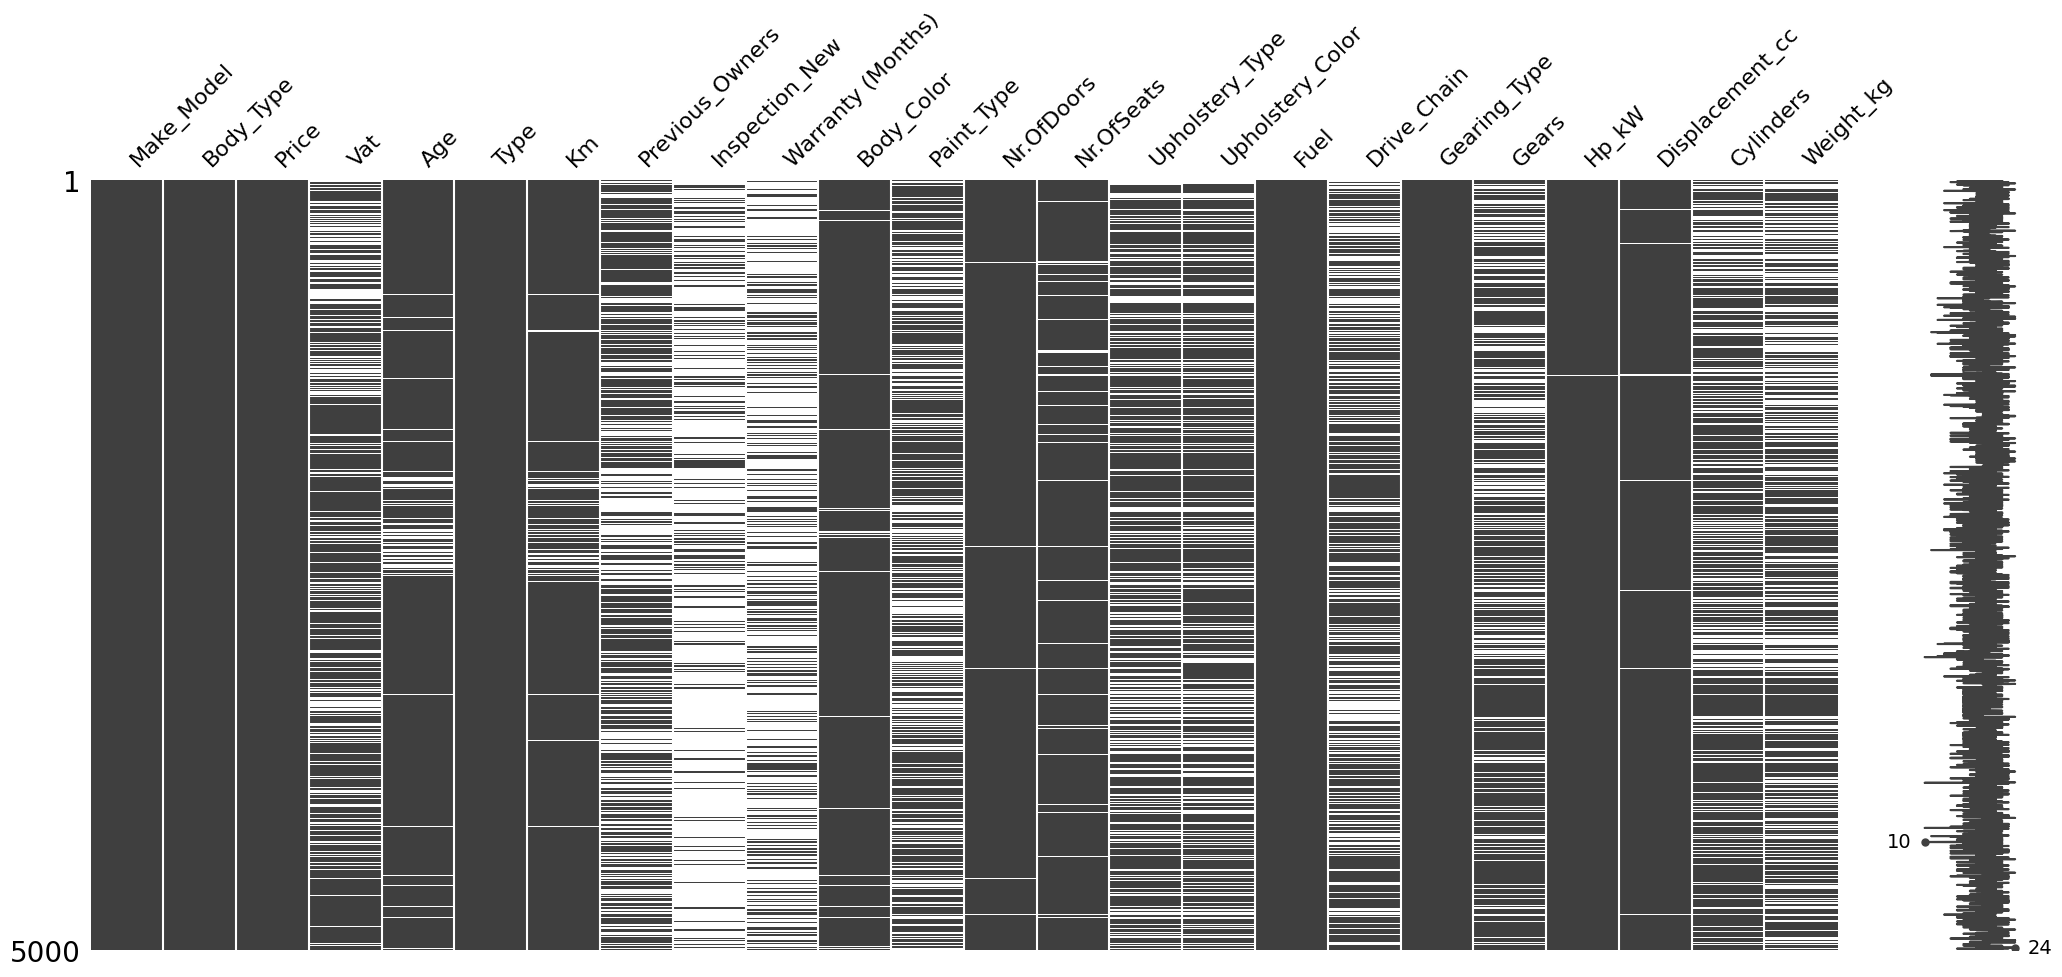

In [24]:
msno.matrix(df)

<Axes: >

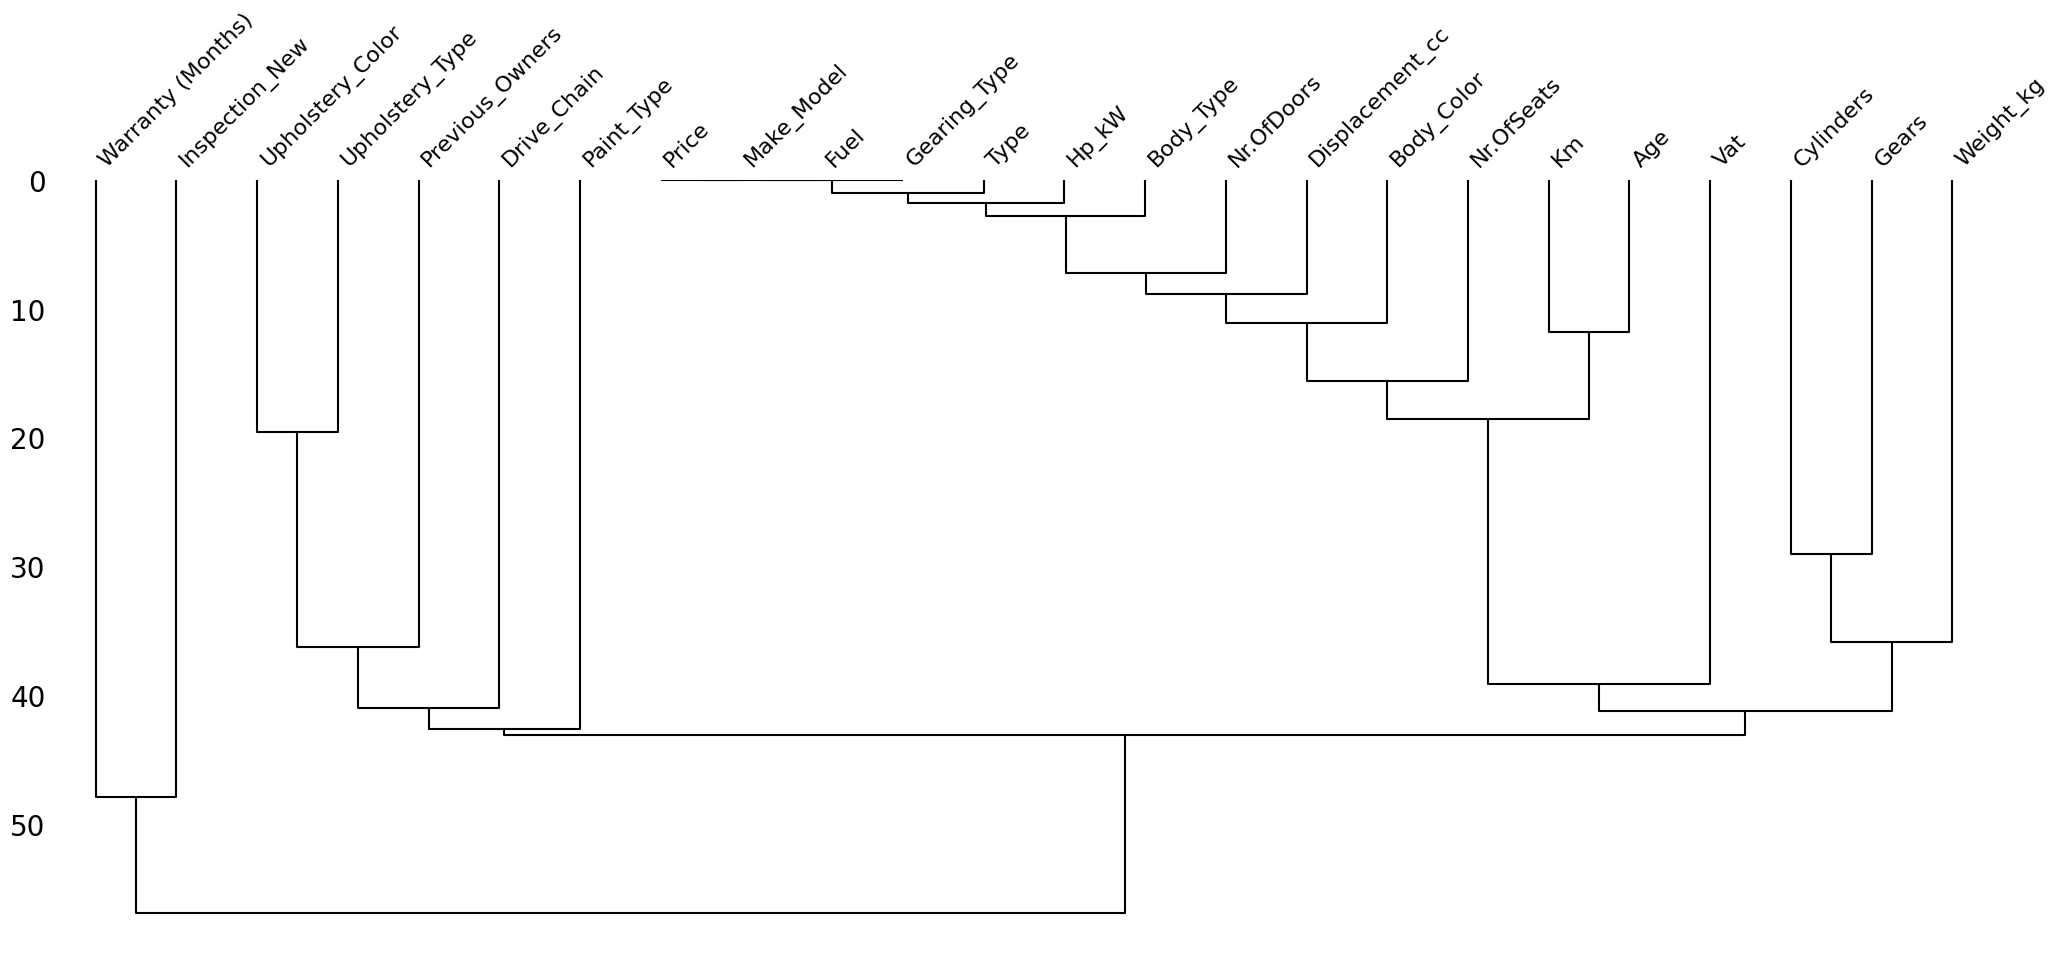

In [25]:
msno.dendrogram(df)

In [26]:
import category_encoders

In [28]:
train = df[:int(0.8*len(df))]
test = df[int(0.8*len(df)):]

In [29]:
train

,Make_Model,Body_Type,Price,Vat,Age,Type,Km,Previous_Owners,Inspection_New,Warranty (Months),...,Upholstery_Type,Upholstery_Color,Fuel,Drive_Chain,Gearing_Type,Gears,Hp_kW,Displacement_cc,Cylinders,Weight_kg
0,Audi A1,Sedans,15770,VAT deductible,3.0,Used,56013.0,2.0,Yes,NaN,...,Cloth,Black,Diesel,front,Automatic,NaN,66.0,1422.0,3.0,1220.0
1,Audi A1,Sedans,14500,Price negotiable,2.0,Used,80000.0,NaN,NaN,NaN,...,Cloth,Grey,Benzine,front,Automatic,7.0,141.0,1798.0,4.0,1255.0
2,Audi A1,Sedans,14640,VAT deductible,3.0,Used,83450.0,1.0,NaN,NaN,...,Cloth,Black,Diesel,front,Automatic,NaN,85.0,1598.0,NaN,NaN
3,Audi A1,Sedans,14500,NaN,3.0,Used,73000.0,1.0,NaN,NaN,...,NaN,NaN,Diesel,NaN,Automatic,6.0,66.0,1422.0,3.0,1195.0
4,Audi A1,Sedans,16790,NaN,3.0,Used,16200.0,1.0,Yes,NaN,...,Cloth,Black,Diesel,front,Automatic,NaN,66.0,1422.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Audi A3,Compact,19700,VAT deductible,1.0,Used,15698.0,NaN,NaN,24.0,...,Full leather,Black,Diesel,front,Automatic,7.0,85.0,1598.0,4.0,1285.0
3996,Audi A3,Sedans,19700,Price negotiable,1.0,Used,29810.0,NaN,NaN,NaN,...,NaN,NaN,Benzine,NaN,Automatic,7.0,110.0,1498.0,4.0,1325.0
3997,Audi A3,NaN,19750,VAT deductible,2.0,Used,38800.0,1.0,NaN,6.0,...,NaN,NaN,Diesel,NaN,Automatic,NaN,82.0,1598.0,NaN,NaN
3998,Audi A3,Sedans,19750,VAT deductible,2.0,Used,157544.0,1.0,Yes,NaN,...,Cloth,Black,Diesel,NaN,Automatic,NaN,110.0,1968.0,NaN,NaN


In [32]:
target = train["Weight_kg"]

In [30]:
def column_type_separation(df):
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()
    return numeric_cols, categorical_cols

In [31]:
numeric_cols, categorical_cols = column_type_separation(df)

In [33]:
from category_encoders.james_stein import JamesSteinEncoder
JSE_encoder = JamesSteinEncoder()
train_jse = JSE_encoder.fit_transform(train[categorical_cols], target)
test_jse = JSE_encoder.transform(test[categorical_cols])

In [34]:
train_jse

,Make_Model,Body_Type,Vat,Type,Inspection_New,Body_Color,Paint_Type,Upholstery_Type,Upholstery_Color,Fuel,Drive_Chain,Gearing_Type
0,1229.089911,1307.322906,1286.800572,1300.799006,1200.127717,1274.162857,1278.965010,1241.977061,1248.888743,1337.861547,1237.826558,1306.777457
1,1229.089911,1307.322906,1265.132450,1300.799006,1303.380929,1296.528003,1301.417931,1241.977061,1278.806519,1236.062135,1237.826558,1306.777457
2,1229.089911,1307.322906,1286.800572,1300.799006,1303.380929,1274.162857,1278.965010,1241.977061,1248.888743,1337.861547,1237.826558,1306.777457
3,1229.089911,1307.322906,1292.387333,1300.799006,1303.380929,1268.749769,1278.965010,1325.648735,1319.300208,1337.861547,1366.874434,1306.777457
4,1229.089911,1307.322906,1292.387333,1300.799006,1200.127717,1274.162857,1278.965010,1241.977061,1248.888743,1337.861547,1237.826558,1306.777457
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1380.235230,1217.607019,1286.800572,1300.799006,1303.380929,1274.162857,1301.417931,1337.772428,1248.888743,1337.861547,1237.826558,1306.777457
3996,1380.235230,1307.322906,1265.132450,1300.799006,1303.380929,1274.162857,1301.417931,1325.648735,1319.300208,1236.062135,1366.874434,1306.777457
3997,1380.235230,1303.071552,1286.800572,1300.799006,1303.380929,1274.162857,1301.417931,1325.648735,1319.300208,1337.861547,1366.874434,1306.777457
3998,1380.235230,1307.322906,1286.800572,1300.799006,1200.127717,1282.744420,1278.965010,1241.977061,1248.888743,1337.861547,1366.874434,1306.777457


In [1]:
import numpy as np
import scipy.stats as stats
x = np.array([12,13,14,19,21,23])
y = np.array([12,13,14,19,21,23,45])
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")
grubbs_test(x)
grubbs_test(y)

Grubbs Calculated Value: 1.4274928542926593
Grubbs Critical Value: 1.887145117792422
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers

Grubbs Calculated Value: 2.2765147221587774
Grubbs Critical Value: 2.019968507680656
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



In [9]:
import numpy as np
import pandas as pd
from scipy import stats

def grubbs_test(x):
    if isinstance(x, (list, np.ndarray, pd.Series)):
        x = np.array(x)  # Convert input to NumPy array
    else:
        raise ValueError("Input must be a list, NumPy array, or pandas Series")

    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x - mean_x))
    g_calculated = numerator / sd_x
    # print("Grubbs Calculated Value:", g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    # print("Grubbs Critical Value:", g_critical)

    if g_critical > g_calculated:
        # print("From grubbs_test we observe that calculated value is lesser than critical value, "
              # "Accept null hypothesis and conclude that there are no outliers\n")
        return False
    else:
        # print("From grubbs_test we observe that calculated value is greater than critical value, "
        #       "Reject null hypothesis and conclude that there are outliers\n")
        return True

# # Example usage
# data_list = [1, 2, 3, 1000]  # Example list data
# data_np_array = np.array(data_list)  # Convert list to NumPy array
# data_pd_series = pd.Series(data_list)  # Convert list to pandas Series

# grubbs_test(data_list)  # Using list input
# grubbs_test(data_np_array)  # Using NumPy array input
# grubbs_test(data_pd_series)  # Using pandas Series input

In [3]:
import pandas as pd
import numpy as np
train = pd.read_csv('data/train.csv')
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(train['LotArea'])

Outliers: [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200]


In [10]:
for col in train.columns.to_list():
    if pd.api.types.is_numeric_dtype(train[col]) and grubbs_test(train[col]):
        print(col)

LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
TotalBsmtSF
1stFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
GarageYrBlt
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
SalePrice


In [23]:
def ZRscore_outlier(df):
    from scipy.stats import median_abs_deviation
    out = []
    med = np.median(df)
    ma = median_abs_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 5: 
            out.append(i)
    print("Outliers:",out)

In [24]:
ZRscore_outlier(train['LotArea'])

Outliers: [50271, 31770, 25419, 159000, 39104, 215245, 164660, 53107, 34650, 70761, 53227, 40094, 32668, 25095, 46589, 26178, 115149, 53504, 28698, 45600, 25286, 27650, 25000, 29959, 35760, 35133, 32463, 24682, 36500, 63887, 25339, 57200, 26142]


In [13]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 12.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 1.0.3 requires matplotlib==3.7.2, but you have matplotlib 3.8.3 which is incompatible.
d2l 1.0.3 requires pandas==2.0.3, but you have pandas 2.2.1 which is incompatible.
d2l 1.0.3 requires scipy==1.10.1, but you have scipy 1.13.0 which is incompatible.
dataprep 0.4.5 requires pandas<2.0,>=1.1, but you have pandas 2.2.1 which is incompatible.
dataprep 0.4.5 requires pydantic<2.0,>=1.6, but you have pydantic 2.6.4 which is incompatible.
ludwig 0.8.6 requires jsonschema<4.7,>=4.5.0, but you have jso

In [25]:
import pandas as pd
from sklearn.cluster import DBSCAN
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))
DB_outliers(train['Fare']) 

KeyError: 'Fare'

In [26]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
df_raw = pd.read_csv('data/creditcard.csv')
df=df_raw.drop(['Time'], axis=1)

In [28]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [29]:
feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline

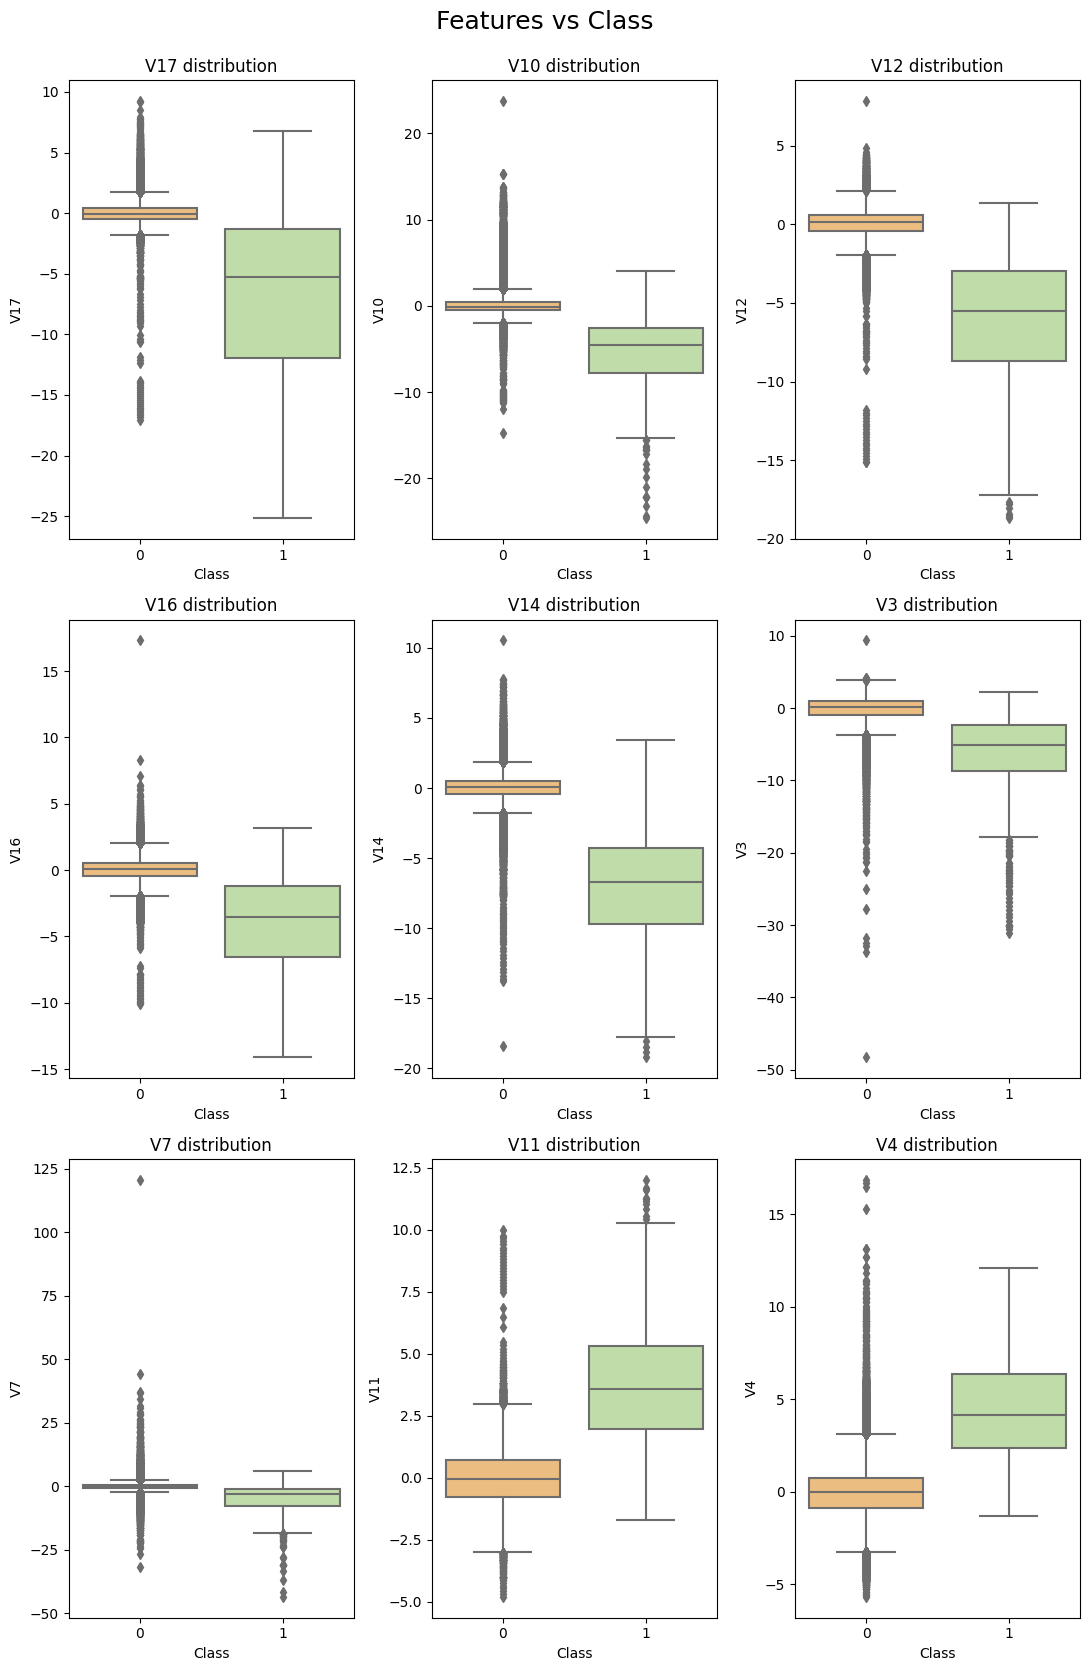

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(11,17))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df, x='Class', y='V17', palette='Spectral')
axes[0,0].set_title("V17 distribution");

sns.boxplot(ax=axes[0, 1], data=df, x='Class', y='V10', palette='Spectral')
axes[0,1].set_title("V10 distribution");

sns.boxplot(ax=axes[0, 2], data=df, x='Class', y='V12', palette='Spectral')
axes[0,2].set_title("V12 distribution");

sns.boxplot(ax=axes[1, 0], data=df, x='Class', y='V16', palette='Spectral')
axes[1,0].set_title("V16 distribution");

sns.boxplot(ax=axes[1, 1], data=df, x='Class', y='V14', palette='Spectral')
axes[1,1].set_title("V14 distribution");

sns.boxplot(ax=axes[1, 2], data=df, x='Class', y='V3', palette='Spectral')
axes[1,2].set_title("V3 distribution");

sns.boxplot(ax=axes[2, 0], data=df, x='Class', y='V7', palette='Spectral')
axes[2,0].set_title("V7 distribution");

sns.boxplot(ax=axes[2, 1], data=df, x='Class', y='V11', palette='Spectral')
axes[2,1].set_title("V11 distribution");

sns.boxplot(ax=axes[2, 2], data=df, x='Class', y='V4', palette='Spectral')
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [33]:
from sklearn.ensemble import IsolationForest

df5 = df.copy()
df5 = df5.drop(['Class'], axis=1)

In [38]:
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.01), max_features=20)
model.fit(df5)

/Users/xiaoyao/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, max_features=20, n_estimators=150)

In [39]:
scores=model.decision_function(df5)
anomaly=model.predict(df5)

df5['scores']=scores
df5['anomaly']=anomaly

df5.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.238443,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.242293,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.131617,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.194785,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.224603,1
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.242468,1
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.237003,1
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.106649,1
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.215466,1
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.237089,1


In [40]:
anomaly = df5.loc[df5['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))
df_out5 = df5.drop(anomaly_index, axis = 0).reset_index(drop=True)

Total number of outliers is: 2849


In [37]:
len(df5)

284807

/Users/xiaoyao/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xiaoyao/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xiaoyao/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xiaoyao/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xiaoyao/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02})

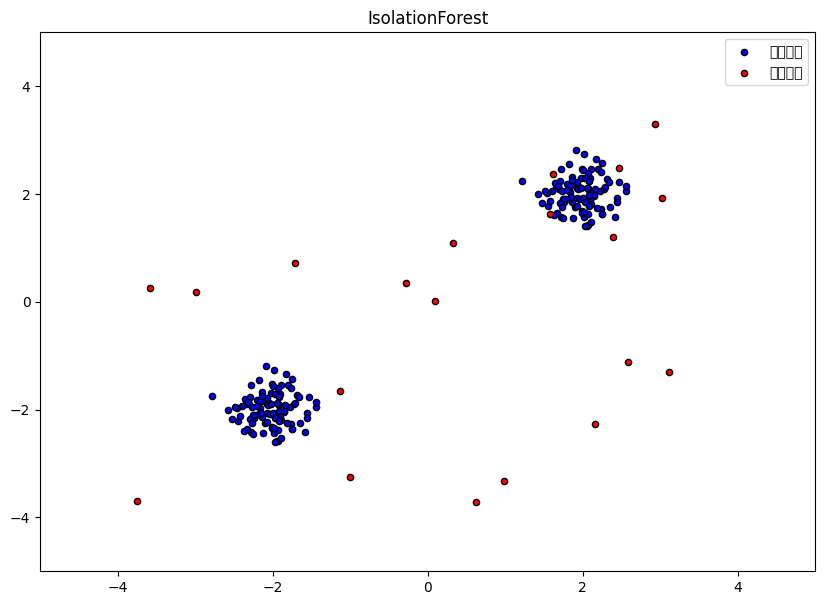

正常数据的预测标签: [ 1 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1  1 -1  1
 -1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1 -1
  1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1  1 -1  1 -1
  1 -1  1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1
  1  1  1  1  1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1  1
  1  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1
  1  1  1 -1  1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1
  1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1  1  1
  1  1 -1  1  1  1  1  1]
异常数据的预测标签: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 生成一些数据
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# 拟合模型
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_outliers = clf.predict(X_outliers)

# 绘图
plt.figure(figsize=(10, 7))
plt.scatter(X_train[:, 0], X_train[:, 1], color='b', s=20, edgecolor='k', label='正常数据')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', s=20, edgecolor='k', label='异常数据')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend()
plt.title("IsolationForest")
plt.show()

# 打印预测结果
print("正常数据的预测标签:", y_pred_train)
print("异常数据的预测标签:", y_pred_outliers)
